In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.special import j0,  jvp # Bessel function of the 1st kind and its derivative
from scipy.misc import derivative

In [2]:
%run ./special_functions.ipynb

In [3]:
np.math.factorial(0)

1

In [5]:
# with simplification
def integrand2(la,r,t,a):
    return np.exp(-a**2*la**2/4) * np.sin(la**2*t)/la * j0(r*la)

def j0_x(x):
    # first derivative of a 1st kind 0th order bessel function
    return jvp(0, x, 1)

def integrand2_eps(la,r,t,a):
    return np.exp(-a**2*la**2/4) * np.sin(la**2*t) * j0_x(r*la)

def integrand2_acc(la,r,t,a):
    return np.exp(-a**2*la**2/4) * np.sin(la**2*t) * la**3 * j0(r*la)

def w2(r,t,params):
    a, j = params
    val, _ = quad(integrand2, 0, 100, args=(r,t,a),
                limit=600, epsabs=1e-6)
    return -j/(2*np.pi) * val

def eps_w2(r,t,params):
    a, j = params
    val, _ = quad(integrand2_eps, 0, 80, args=(r,t,a),
                limit=1000, epsabs=1e-4)
    return j/(2*np.pi) * val

def acc_w2(r,t,params):
    a, j = params
    val, _ = quad(integrand2_acc, 0, 100, args=(r,t,a),
                 limit=600, epsabs=1e-6)
    return -j/(2*np.pi) * val


#stationary phase approximation
def w_sf(r,t,params):
    a, j = params
    return -j/(4*np.pi*t**2)*np.exp(-a**2 * r**2 / (16 * t**2))*r**2/(4*t)*np.cos(r**2/(4*t))

## With simplification

### displacements

In [34]:
a = 1
j = 1
params2 = (a,j)
r_sections = [50, 200, 400]
t = np.linspace(0.1, 100, 2000)
w_solution2 = solve(w2, r_sections, t, params2)

KeyboardInterrupt: 

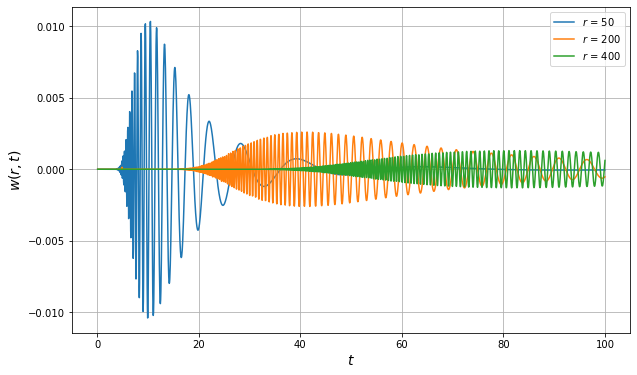

In [25]:
name = 'plate_displacements_r=[50,200,400]'
plot_results(t, w_solution2, r_sections, figname=name, 
            lgd=r'$r$', xl=r'$t$', yl=r'$w(r,t)$', title=None, fontsize=14)

### deformations

In [38]:
a = 1
j = 1
params2 = (a,j)
r_sections = [50, 200, 400]
t = np.linspace(0, 100, 2000)
w_solution2_eps = solve(eps_w2, r_sections, t, params2)

C:\Users\imjob\AppData\Local\Temp/ipykernel_11924/1605390544.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val, _ = quad(integrand2_eps, 0, 80, args=(r,t,a),


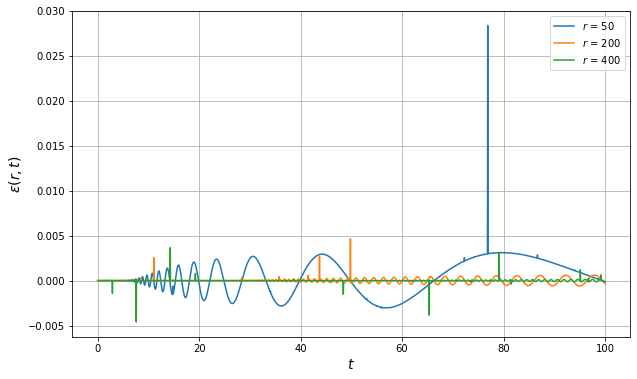

In [40]:
name = 'plate_deformations_r=[50,200,400]'
plot_results(t, w_solution2_eps, r_sections, figname=None, 
            lgd=r'$r$', xl=r'$t$', yl=r'$\varepsilon(r,t)$', title=None, fontsize=14)

### acceleration from time with r-sections

In [ ]:
a = 1
j = 1
params2 = (a,j)
r_sections = [50, 200, 400]
t = np.linspace(0, 100, 2000)
w_solution2_acc = solve(acc_w2, r_sections, t, params2)

NameError: name 'w2' is not defined

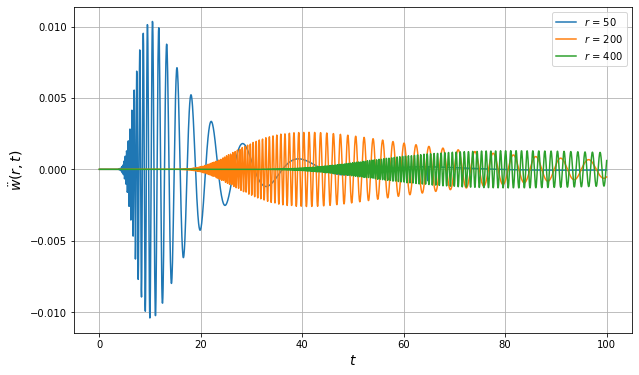

In [ ]:
name = 'plate_acceleration_r=[50,200,400]'
plot_results(t, w_solution2_acc, r_sections, figname=None, 
            lgd=r'$r$', xl=r'$t$', yl=r'$\ddot{w}(r,t)$', title=None, fontsize=14)

### acceleration from radius with time sections

In [7]:
w2_time = lambda t,r,params: w2(r,t,params)
a = 1
j = 1
params4 = (a,j)
t_sections = [10, 20, 50]
r = np.linspace(0, 400, 2000)
w_solution4 = solve(w2_time, t_sections, r, params4)

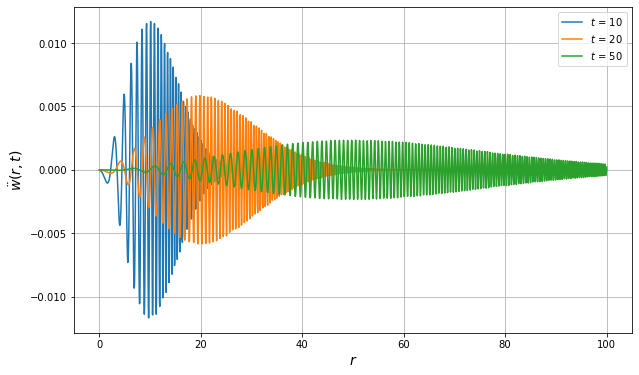

In [10]:
name = 'plate_acceleration_t=[10,20,50]'
plot_results(t, w_solution4, t_sections, figname=None, 
            lgd=r'$t$', xl=r'$r$', yl=r'$\ddot{w}(r,t)$', title=None, fontsize=14)

## Stationary phase approximation

$$ \ddot{w}\left(r,t\right)=-\frac{j}{4\pi t^{2}}\exp\left(-\frac{a^{2}r^{2}}{16t^{2}}\right)\cdot\frac{r^{2}}{4t}\cos\left(\frac{r^{2}}{4t}\right) $$

### acceleration from time with r-sections

In [11]:
a = 1
j = 1
params_sf = (a,j)
r_sections = [50, 200, 400]
t = np.linspace(1, 100, 2000)
w_solution_sf = solve(w_sf, r_sections, t, params_sf)

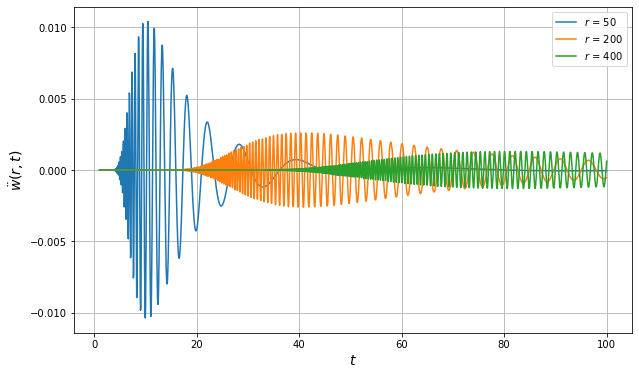

In [13]:
name = 'plate_acceleration_r=[50,200,400]_sf'
plot_results(t, w_solution_sf, r_sections, figname=None, 
             lgd=r'$r$', xl=r'$t$', yl=r'$\ddot{w}(r,t)$', title=None, fontsize=14)

### acceleration from radius with time sections

In [14]:
w2_time_sf = lambda t,r,params: w_sf(r,t,params)
w_solution_time_sf = solve(w2_time_sf, t_sections, r, params4)

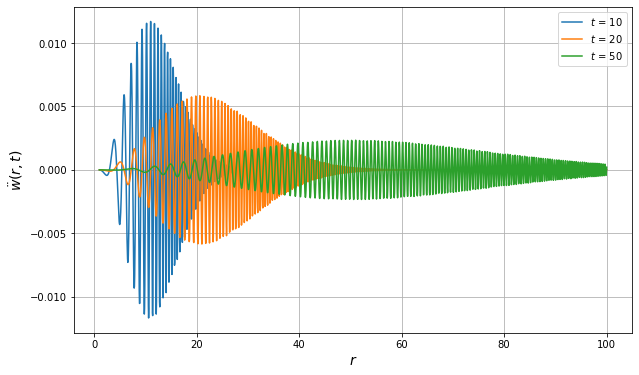

In [16]:
name = 'plate_acceleration_t=[10,20,50]_sf'
plot_results(t, w_solution_time_sf, t_sections, figname=None, 
             lgd=r'$t$', xl=r'$r$', yl=r'$\ddot{w}(r,t)$', title=None, fontsize=14)

## Displacements $w$ and deformations $\varepsilon$